In [39]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

# Afficher la forme et les colonnes du Train et Test sets
print("=== TRAIN SET ===")
print(train.shape)
print(train.columns)

print("\n=== TEST SET ===")
print(test.shape)
print(test.columns)

# Aperçu des premières lignes
train.head()


=== TRAIN SET ===
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

=== TEST SET ===
(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Étudier les valeurs manquantes

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

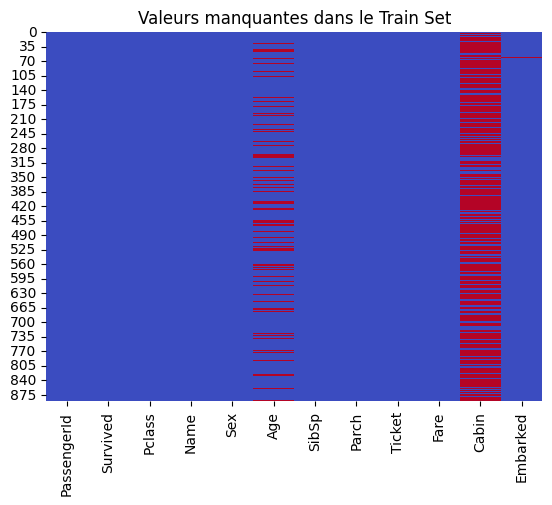

In [5]:
plt.Figure(figsize=(10,5))
sns.heatmap(train.isnull(), cbar=False, cmap='coolwarm')
plt.title("Valeurs manquantes dans le Train Set")
plt.show()

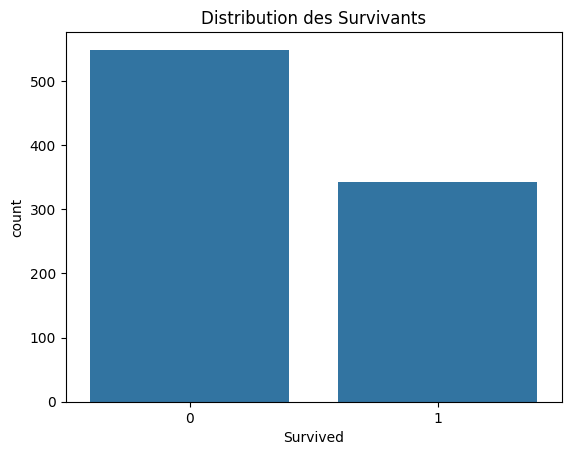

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [6]:
sns.countplot(data=train, x='Survived')
plt.title("Distribution des Survivants")
plt.show()

train['Survived'].value_counts(normalize=True)

Environ 38 % des passagers ont survécu

62 % sont morts

# Survie selon le sexe

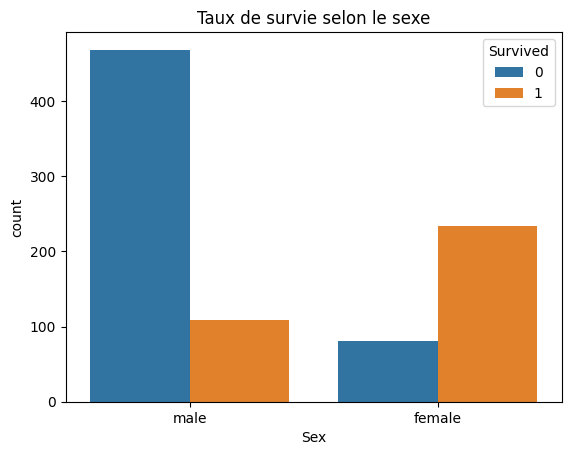

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [7]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Taux de survie selon le sexe")
plt.show()

train.groupby('Sex')['Survived'].mean()


74 % des femmes ont survécu

19 % des hommes seulement

# Survie selon la classe (Pclass)

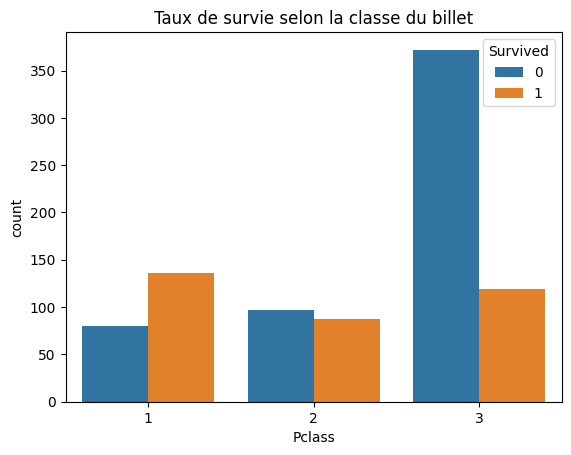

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [8]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title("Taux de survie selon la classe du billet")
plt.show()

train.groupby('Pclass')['Survived'].mean()


# Survie selon l’âge

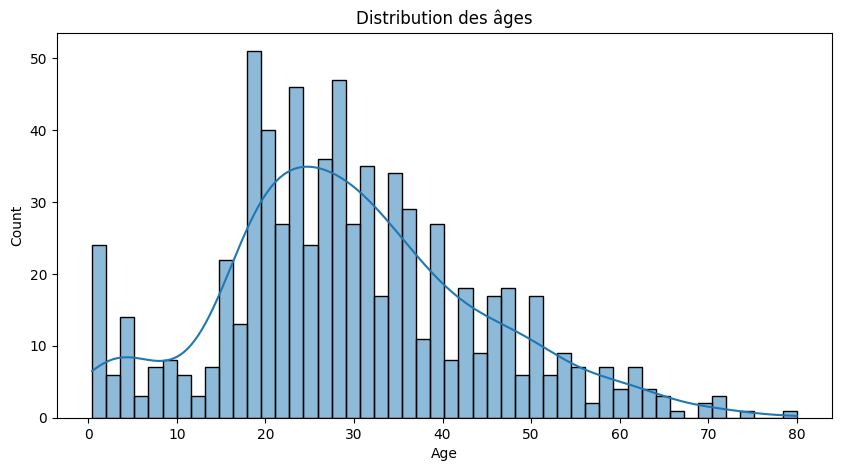

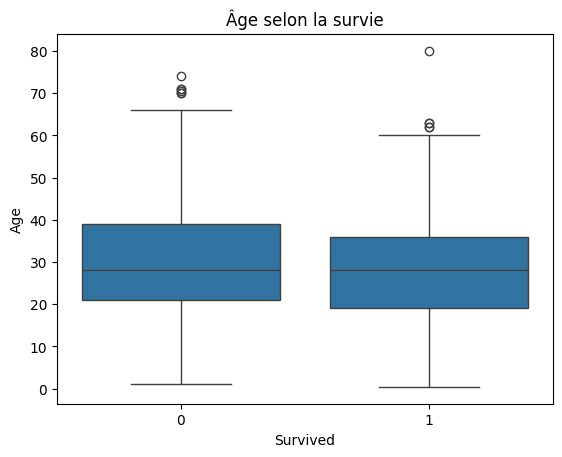

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(train['Age'], bins=50, kde=True)
plt.title("Distribution des âges")
plt.show()

sns.boxplot(data=train, x='Survived', y='Age')
plt.title("Âge selon la survie")
plt.show()


# Survie selon le port d’embarquement (Embarked)

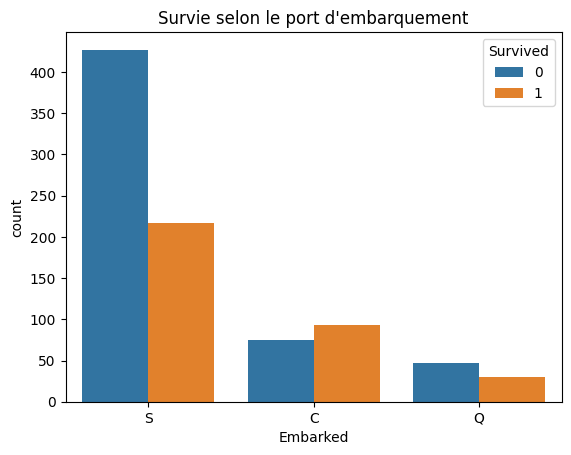

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [19]:
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.title("Survie selon le port d'embarquement")
plt.show()

train.groupby('Embarked')['Survived'].mean()


# Survie selon le prix du billet (Fare)

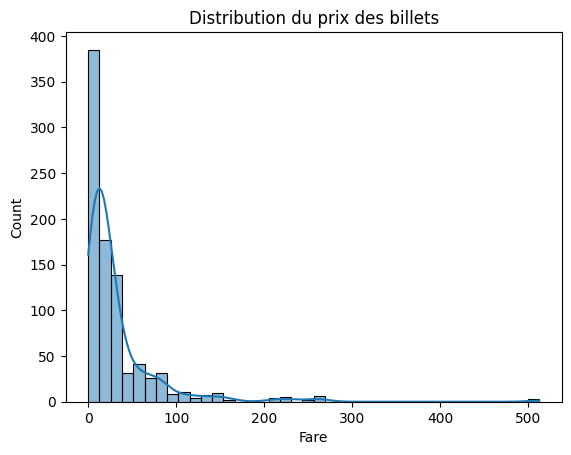

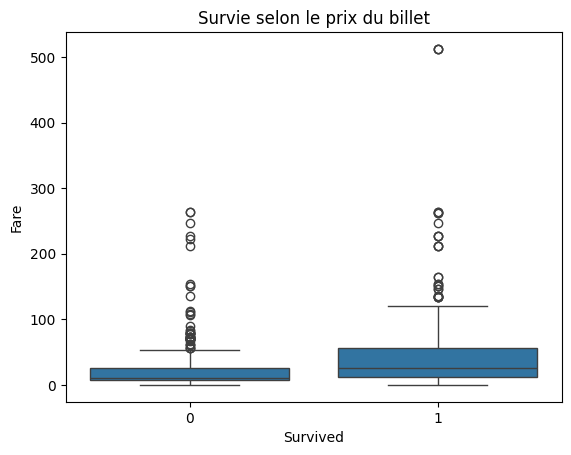

In [25]:
sns.histplot(train['Fare'], bins=40, kde=True)
plt.title("Distribution du prix des billets")
plt.show()

sns.boxplot(data=train, x='Survived', y='Fare')
plt.title("Survie selon le prix du billet")
plt.show()


Conversion en valeurs numériques : male = 0 , female = 1

In [40]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})


In [41]:
train['Sex'].head()



0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

Conversion en valeurs numériques : 'S'= 0 , 'C'=1, 'Q'=2

In [43]:
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [44]:
train['Embarked'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

# matrice de corrélation

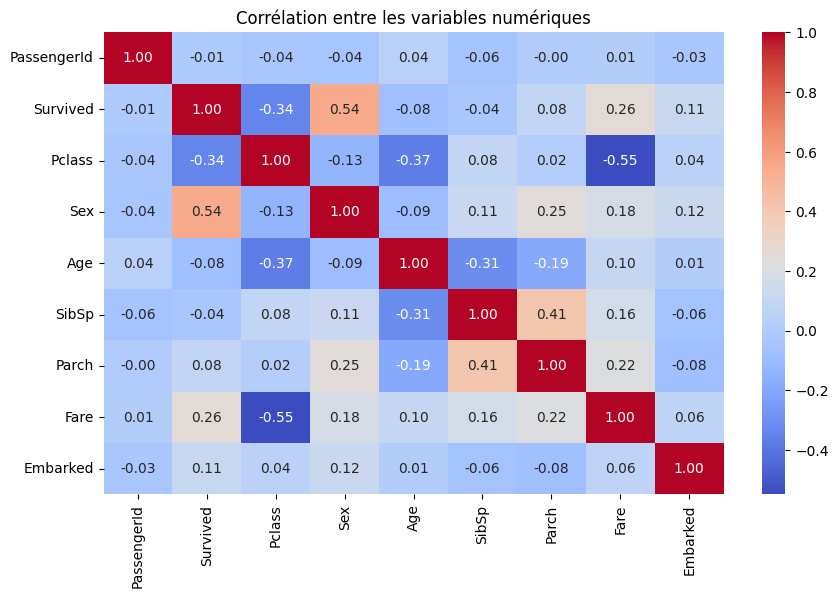

In [45]:
df_num = train.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables numériques")
plt.show()